# **BITCOIN DEATH CROSS**

In [ ]:
#Description: A Death Cross Program

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the Bitcoin data
from google.colab import files
files.upload()

Saving BTC.csv to BTC.csv


{'BTC.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2016-03-26,10.7679,11.1808,10.5892,10.974,10.974,9425480\r\n2016-03-27,10.9861,11.0542,10.1121,10.4192,10.4192,16744800\r\n2016-03-28,10.4314,11.8613,10.4075,11.6656,11.6656,23188300\r\n2016-03-29,11.7527,11.9136,11.3498,11.6564,11.6564,17684200\r\n2016-03-30,11.6053,12.1785,11.4692,11.9529,11.9529,19351200\r\n2016-03-31,11.9198,12.0119,11.3157,11.4035,11.4035,14966700\r\n2016-04-01,11.4006,11.8504,11.4006,11.6636,11.6636,11373100\r\n2016-04-02,11.6306,11.6888,11.3988,11.5989,11.5989,8682620\r\n2016-04-03,11.6283,11.7064,11.5087,11.6183,11.6183,5580550\r\n2016-04-04,11.6158,11.6158,11.0163,11.1573,11.1573,9599070\r\n2016-04-05,11.2125,11.2125,10.1347,10.4381,10.4381,20557300\r\n2016-04-06,10.4498,10.97,10.2773,10.6854,10.6854,16997100\r\n2016-04-07,10.6952,10.8097,9.95363,10.0697,10.0697,13464500\r\n2016-04-08,10.0774,10.3875,9.65558,9.71959,9.71959,14660600\r\n2016-04-09,9.69423,10.0889,9.06814,9.15062,9.15062,16194800\r\n2016

In [ ]:
#Store the data
df = pd.read_csv('BTC.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2016-03-26,2016-03-26,10.767900,11.180800,10.589200,10.974000,10.974000,9425480
2016-03-27,2016-03-27,10.986100,11.054200,10.112100,10.419200,10.419200,16744800
2016-03-28,2016-03-28,10.431400,11.861300,10.407500,11.665600,11.665600,23188300
2016-03-29,2016-03-29,11.752700,11.913600,11.349800,11.656400,11.656400,17684200
2016-03-30,2016-03-30,11.605300,12.178500,11.469200,11.952900,11.952900,19351200
...,...,...,...,...,...,...,...
2021-03-18,2021-03-18,1788.362183,1811.968262,1674.299805,1691.333984,1691.333984,23599296129
2021-03-19,2021-03-19,1690.871826,1725.108765,1662.539917,1678.650146,1678.650146,21998237965
2021-03-20,2021-03-20,1678.002563,1740.428223,1570.787964,1593.413452,1593.413452,31228051473
2021-03-21,2021-03-21,1593.123291,1625.911499,1560.370483,1595.359253,1595.359253,29650328701


In [ ]:
#Create the Simple Moving Average (SMA)
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

In [ ]:
#Create a new column to store the Short term and Long term SMA
df ['ShortSMA'] = SMA(df, 50)
df ['LongSMA'] = SMA(df, 200)

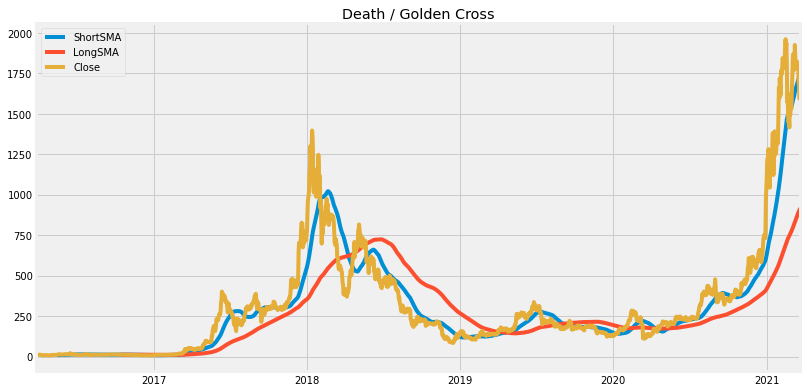

In [ ]:
#Plot the chart
#Create a list of columns to show
column_list = ['ShortSMA', 'LongSMA', 'Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Death / Golden Cross')
plt.show()


In [ ]:
#Create a function to see the dates of each death cross andgolden cross within the data set
def death_golden_cross():

  first_cross = 0
  #Loop through the length of the data set
  for i in range(0, len(df)):
    if df['ShortSMA'][i] < df['LongSMA'][i] and first_cross == 0:
       print('Death cross on day', df.index[i],  ':expect the  price to continue to fall')
       first_cross = 1
    elif df['ShortSMA'][i] > df['LongSMA'][i] and first_cross == 1:
       print('Golden cross on day', df.index[i], ':expect the  price to continue to rise')
       first_cross = 0

In [ ]:
#Show the dates of each death cross and golden cross
death_golden_cross()

Death cross on day 2016-11-11 00:00:00 :expect the  price to continue to fall
Golden cross on day 2017-02-19 00:00:00 :expect the  price to continue to rise
Death cross on day 2018-04-10 00:00:00 :expect the  price to continue to fall
Golden cross on day 2019-04-19 00:00:00 :expect the  price to continue to rise
Death cross on day 2019-09-05 00:00:00 :expect the  price to continue to fall
Golden cross on day 2020-02-16 00:00:00 :expect the  price to continue to rise
Death cross on day 2020-04-11 00:00:00 :expect the  price to continue to fall
Golden cross on day 2020-05-13 00:00:00 :expect the  price to continue to rise
